In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
team_game_file_path = os.path.join('..', 'raw_data', 'team_game_level_data.csv')
team_game_df = pd.read_csv(team_game_file_path)
team_game_df

,game_id,date,round,region,seed,team,score,opponent_seed,opponent,opponent_score,overtime,score_diff,win,seed_id
0,0,1985-03-14,Round of 64,East,1,Georgetown,68,16,Lehigh,43,NaN,25,1,1_16_fav
1,0,1985-03-14,Round of 64,East,16,Lehigh,43,1,Georgetown,68,NaN,-25,0,1_16_dog
2,1,1985-03-14,Round of 64,East,4,"Loyola, Illinois",59,13,Iona,58,NaN,1,1,4_13_fav
3,1,1985-03-14,Round of 64,East,13,Iona,58,4,"Loyola, Illinois",59,NaN,-1,0,4_13_dog
4,2,1985-03-14,Round of 64,East,5,Southern Methodist,85,12,Old Dominion,68,NaN,17,1,5_12_fav
5,2,1985-03-14,Round of 64,East,12,Old Dominion,68,5,Southern Methodist,85,NaN,-17,0,5_12_dog
6,3,1985-03-14,Round of 64,East,9,Virginia Tech,57,8,Temple,60,NaN,-3,0,8_9_dog
7,3,1985-03-14,Round of 64,East,8,Temple,60,9,Virginia Tech,57,NaN,3,1,8_9_fav
8,4,1985-03-14,Round of 64,Midwest,16,North Carolina A&T,83,1,Oklahoma,96,NaN,-13,0,1_16_dog
9,4,1985-03-14,Round of 64,Midwest,1,Oklahoma,96,16,North Carolina A&T,83,NaN,13,1,1_16_fav


In [5]:
## Creates a function to group and compare data upset data in a bar graph
def upset_bar_chart(team_game_df, column):
    winner_df = team_game_df[team_game_df['win'] == 1]
    winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
    winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
    winner_df['abs_seed_diff'] = abs(winner_df['seed_diff'])
    winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
    winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
    upsets_groupby = winner_df[['game_id', 'upset', column]].groupby(column)
    upsets_df = upsets_groupby.agg({'game_id': 'count',
                                   'upset': 'sum'})
    upsets_df.columns = ['total_games', 'num_upsets']
    upsets_df.reset_index(inplace=True)
    if column =='round':
        upsets_df = upsets_df[upsets_df['round'] != 'Opening Round']
        round_num_dict = {'Opening Round': 0,
                          'Round of 64': 1,
                          'Round of 32': 2,
                          'Sweet Sixteen': 3,
                          'Elite Eight': 4,
                          'National Semifinals': 5,
                          'National Championship': 6}
        upsets_df['round_num'] = [round_num_dict[round] for round in upsets_df['round']]
        column = 'round_num'
    upsets_df.sort_values(column, inplace=True)
    upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
    plt.style.use('seaborn')
    tick_loc = range(len(upsets_df[column]))
    plt.figure(figsize=(15,5))
    plt.bar(tick_loc, upsets_df['upset_perc'],
            width=0.2,align='center')
    plt.xticks(tick_loc, upsets_df[column], rotation=90)
    plt.show()
    ##return winner_df
    

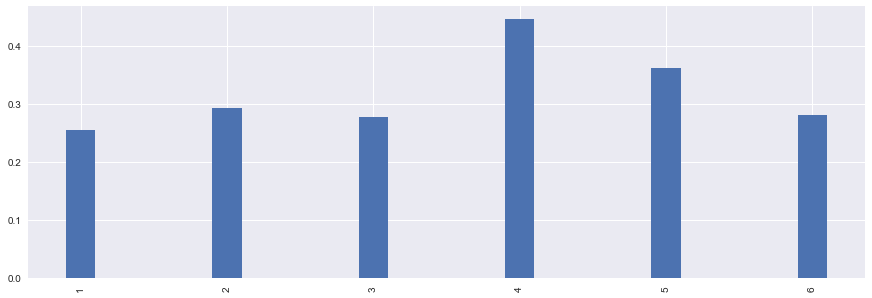

In [6]:
## Compares percentage of upsets each round
upset_bar_chart(team_game_df, 'round') 

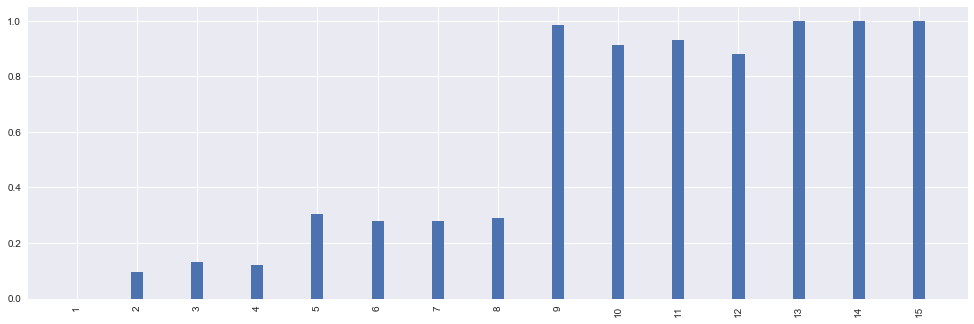

In [26]:
## Shows the perecentage of time a team wins that the win was an upset
upset_bar_chart(team_game_df, 'seed') 

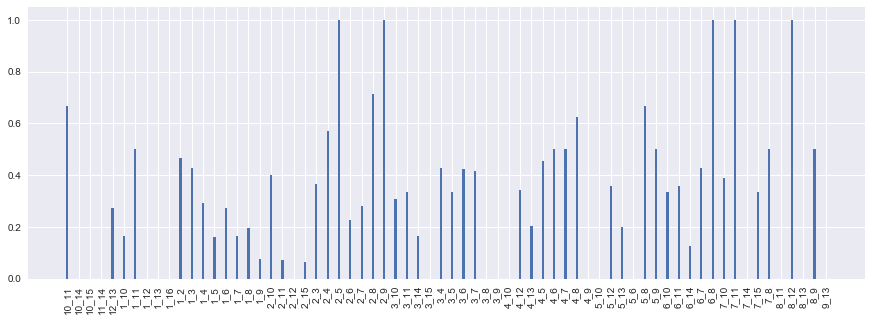

In [8]:
## Shows percentage of upsets by seed matchup
upset_bar_chart(team_game_df, 'matchup')

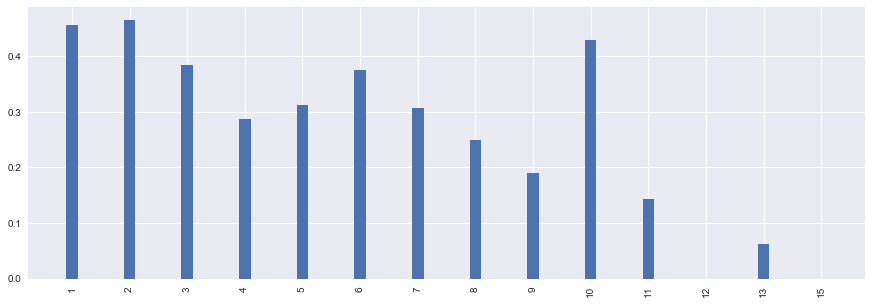

In [9]:
## Shows percentage of upsets by seed difference
upset_bar_chart(team_game_df, 'abs_seed_diff')

In [22]:
## A function to ploto scatter a scatter plot of upset percentage by a grouping
def upset_scatter(team_game_df, column):
    winner_df = team_game_df[team_game_df['win'] == 1]
    winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
    winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
    winner_df['abs_seed_diff'] = abs(winner_df['seed_diff'])
    winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
    winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
    upsets_groupby = winner_df[['game_id', 'upset', column]].groupby(column)
    upsets_df = upsets_groupby.agg({'game_id': 'count',
                                   'upset': 'sum'})
    upsets_df.columns = ['total_games', 'num_upsets']
    upsets_df.reset_index(inplace=True)
    if column =='round':
        upsets_df = upsets_df[upsets_df['round'] != 'Opening Round']
        round_num_dict = {'Opening Round': 0,
                          'Round of 64': 1,
                          'Round of 32': 2,
                          'Sweet Sixteen': 3,
                          'Elite Eight': 4,
                          'National Semifinals': 5,
                          'National Championship': 6}
        upsets_df['round_num'] = [round_num_dict[round] for round in upsets_df['round']]
        column = 'round_num'
    upsets_df.sort_values(column, inplace=True)
    upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
    tick_loc = range(len(upsets_df[column]))
    plt.style.use('seaborn')
    plt.figure(figsize=(15,5))
    plt.scatter(tick_loc, upsets_df['upset_perc'], s=upsets_df['total_games'])
    plt.xticks(tick_loc, upsets_df[column], rotation=90)
    plt.show()
    

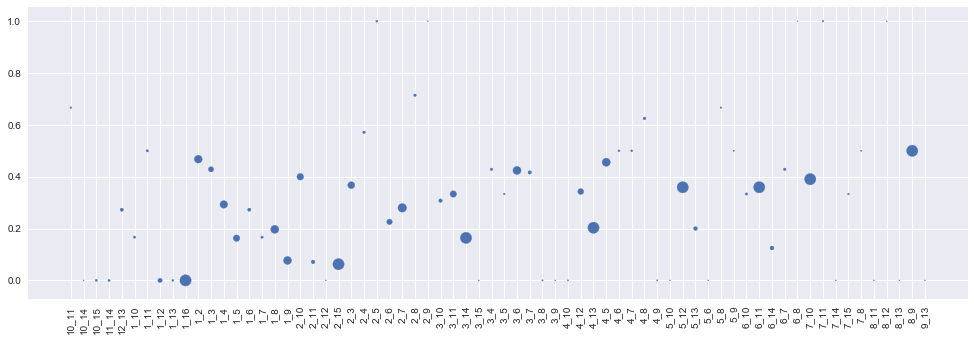

In [27]:
## Scatter plot that shows mean of percentage of upsets by seed matchup
upset_scatter(team_game_df, 'matchup')

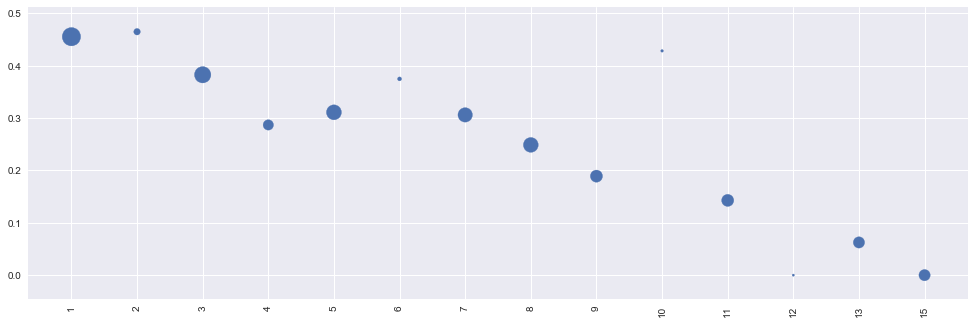

In [28]:
## Scatter plot that shows mean of percentage of upsets by absolute seed difference
upset_scatter(team_game_df, 'abs_seed_diff')

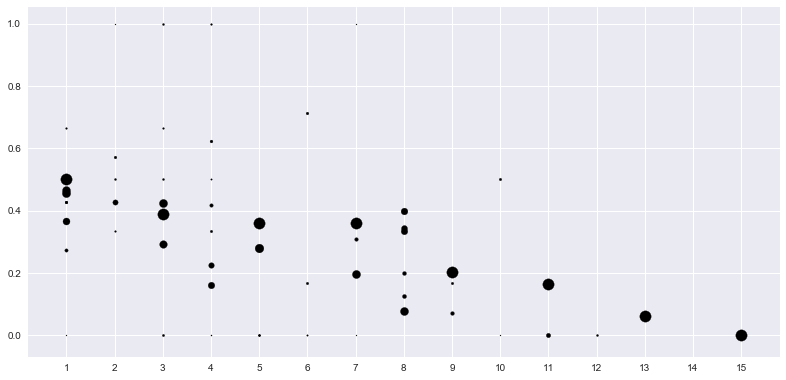

In [29]:
## Scatter plot that shows mean of percentage of upsets by absolute seed difference and seed matchup 
winner_df = team_game_df[team_game_df['win'] == 1]
winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
winner_df['abs_seed_diff'] = abs(winner_df['seed_diff'])
upsets_groupby = winner_df[['win', 'upset', 'abs_seed_diff', 'matchup']].groupby(['abs_seed_diff', 'matchup'])
upsets_df = upsets_groupby.agg('sum')
upsets_df.columns = ['total_games', 'num_upsets']
upsets_df.reset_index(inplace=True)
upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
matchup_list = list(set(upsets_df['matchup']))
plt.style.use('seaborn')
plt.figure(figsize=(12,6))
for matchup in matchup_list:
    matchup_df = upsets_df[upsets_df['matchup'] == matchup]
    plt.scatter(matchup_df['abs_seed_diff'], matchup_df['upset_perc'], s=matchup_df['total_games'],
                c='black')
tick_loc = range(1,16)
plt.xticks(tick_loc)
plt.show()
    
    


In [14]:
## Create a matchup dataframe on the team level-underdog where all teams
under_dog_df = team_game_df[team_game_df['seed'] != team_game_df['opponent_seed']].copy()
under_dog_df['underdog'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in under_dog_df['seed_id']]
under_dog_df = under_dog_df[under_dog_df['underdog'] == 1].copy()
under_dog_df['seed_diff'] = under_dog_df['opponent_seed'] - under_dog_df['seed']
under_dog_df['abs_seed_diff'] = abs(under_dog_df['seed_diff'])
under_dog_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in under_dog_df['seed_id']]
best_fit = np.polyfit(under_dog_df['abs_seed_diff'], under_dog_df['win'], deg=1)
under_dog_df['best_fit'] = best_fit[0] * under_dog_df['abs_seed_diff'] + best_fit[1]

In [15]:
## create upsets_df
winner_df = team_game_df[team_game_df['win'] == 1]
winner_df = winner_df[winner_df['seed'] != winner_df['opponent_seed']]
winner_df['seed_diff'] = winner_df['opponent_seed'] - winner_df['seed']
winner_df['upset'] = [1 if seed_id[len(seed_id)-3:] == 'dog' else 0 for seed_id in winner_df['seed_id']]
winner_df['matchup'] = [seed_id if len(seed_id)<6 else seed_id[:len(seed_id)-4] for seed_id in winner_df['seed_id']]
winner_df['abs_seed_diff'] = abs(winner_df['seed_diff'])
upsets_groupby = winner_df[['win', 'upset', 'abs_seed_diff', 'matchup']].groupby(['abs_seed_diff', 'matchup'])
upsets_df = upsets_groupby.agg('sum')
upsets_df.columns = ['total_games', 'num_upsets']
upsets_df.reset_index(inplace=True)
upsets_df['upset_perc'] = upsets_df['num_upsets'] / upsets_df['total_games']
upsets_df['best_fit'] = best_fit[0] * upsets_df['abs_seed_diff'] + best_fit[1]
first_year = 1985
last_year = 2016
total_years = last_year - first_year
upsets_df['games_per_year'] = upsets_df['total_games'] / total_years

In [16]:
def plot_all_matchups_best_fit(upsets_df, under_dog_df):
    plt.style.use('seaborn')
    plt.figure(figsize=(12,6))
    matchup_list = list(set(upsets_df['matchup']))
    for i in range(len(matchup_list)):
        matchup = matchup_list[i]
        matchup_df = upsets_df[upsets_df['matchup'] == matchup]
        plt.scatter(matchup_df['abs_seed_diff'], matchup_df['upset_perc'],
                    s=matchup_df['total_games'], c='#778899', alpha=0.8)  #484848
    plt.plot(under_dog_df['abs_seed_diff'], under_dog_df['best_fit'],
         linewidth = .3, color = 'black')  #B20000
    tick_loc = range(1,16)
    plt.xticks(tick_loc)
    plt.title('Percentage of Upset by Matchup')
    plt.xlabel('Match Up Seed Difference')
    plt.ylabel('Percentage of Upsets')

# Games to Watch

In [17]:
def plot_subset_matchups(subset_df, bottom_top_flag, num_matchups, color, marker):
    subset_df['adjusted_upset_perc'] = subset_df['upset_perc'] - subset_df['best_fit']
    subset_df.sort_values('adjusted_upset_perc', ascending=False, inplace=True)
    if bottom_top_flag == 'top':
        plot_df = subset_df.head(num_matchups)
        plot_df = plot_df[plot_df['adjusted_upset_perc'] > 0]
        if len(plot_df) == 0:
            print(f'No matchup(s) fit the stated criteria')
        elif len(plot_df) < num_matchups:
            print(f'Only {len(plot_df)} matchup(s) fit the stated criteria')
    elif bottom_top_flag == 'bottom':
        plot_df = subset_df.bottom(num_matchups)
        plot_df = plot_df[plot_df['adjusted_upset_perc'] < 0]
        if len(plot_df) == 0:
            print(f'No matchup(s) fit the stated criteria')
        elif len(plot_df) < num_matchups:
            print(f'Only {len(plot_df)} matchup(s) fit the stated criteria')
    print(plot_df)
    matchup_list = list(set(plot_df['matchup']))
    for i in range(len(matchup_list)):
        matchup = matchup_list[i]
        matchup_df = plot_df[plot_df['matchup'] == matchup]
        plt.scatter(plot_df['abs_seed_diff'], plot_df['upset_perc'],
                    s=plot_df['total_games'], c=color,
                    marker = marker)

## These matchups that don't happen very often, but watch when they do
 - 6 with more upsets than expected
 - 3 appear to deviat drastically from expectated

Only 6 matchup(s) fit the stated criteria
    abs_seed_diff matchup  total_games  num_upsets  upset_perc  best_fit  \
17              3     2_5            4           4    1.000000  0.389598   
42              6     2_8            7           5    0.714286  0.295620   
60             10    1_11            6           3    0.500000  0.170316   
11              2     2_4            7           4    0.571429  0.420925   
19              3     4_7            4           2    0.500000  0.389598   
13              2     4_6            4           2    0.500000  0.420925   

    games_per_year  adjusted_upset_perc  
17        0.129032             0.610402  
42        0.225806             0.418666  
60        0.193548             0.329684  
11        0.225806             0.150504  
19        0.129032             0.110402  
13        0.129032             0.079075  


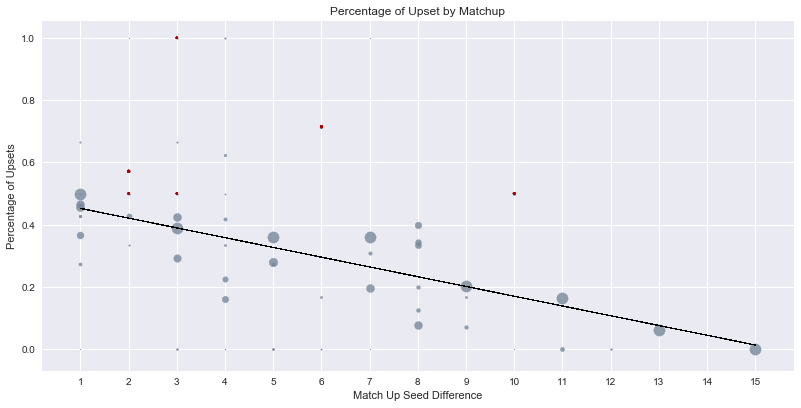

In [18]:
low_freq_df = upsets_df[(upsets_df['total_games'] > 3) & (upsets_df['games_per_year'] < .25)].copy()
plot_all_matchups_best_fit(upsets_df, under_dog_df)
plot_subset_matchups(low_freq_df, 'top', 10, '#B20000', 'o')
plt.show()


## Great matchups that happen every 2-4 years
 - 3 with more upsets than expected
 - 1 appears to deviat drastically from expectated

Only 3 matchup(s) fit the stated criteria
    abs_seed_diff matchup  total_games  num_upsets  upset_perc  best_fit  \
27              4     4_8            8           5    0.625000  0.358272   
26              4     3_7           12           5    0.416667  0.358272   
47              7    3_10           13           4    0.307692  0.264294   

    games_per_year  adjusted_upset_perc  
27        0.258065             0.266728  
26        0.387097             0.058394  
47        0.419355             0.043398  


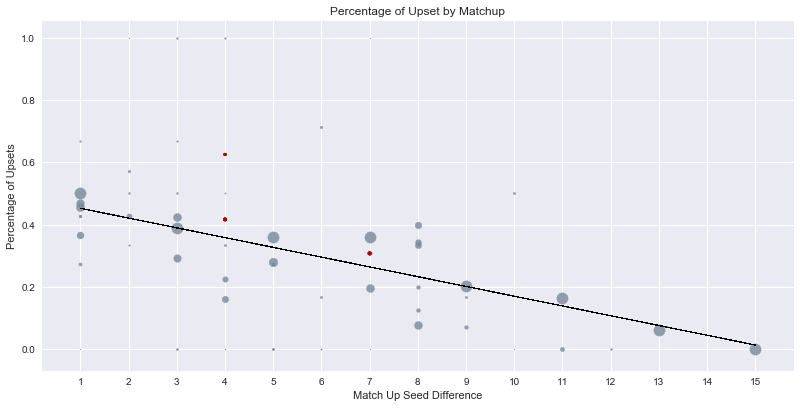

In [19]:
semi_freq_df = upsets_df[(upsets_df['games_per_year'] >= .25) & (upsets_df['games_per_year'] <= .5)].copy()
plot_all_matchups_best_fit(upsets_df, under_dog_df)
plot_subset_matchups(semi_freq_df, 'top', 5, '#B20000', 'o')
plt.show()

# Great matchups that happen almost every year
- Only 3 matchups fall under this criteria
- Only one has adjusted upset percent > 0, it is not a drasticaly higher

Only 1 matchup(s) fit the stated criteria
    abs_seed_diff matchup  total_games  num_upsets  upset_perc  best_fit  \
10              2     1_3           28          12    0.428571  0.420925   

    games_per_year  adjusted_upset_perc  
10        0.903226             0.007647  


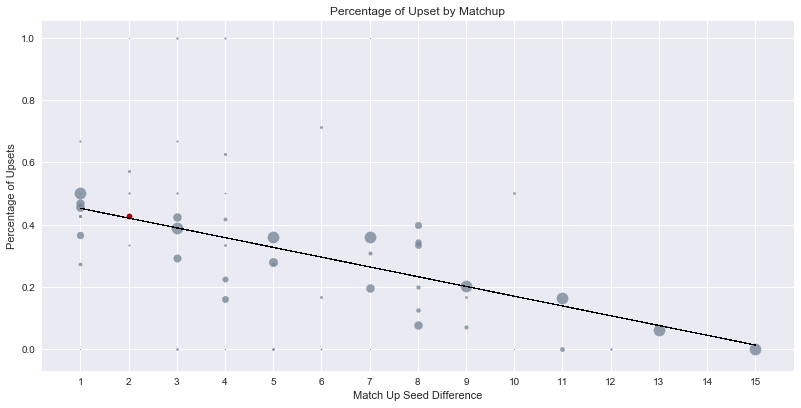

In [20]:
freq_df = upsets_df[(upsets_df['games_per_year'] > .5) & (upsets_df['games_per_year'] < 1)].copy()
plot_all_matchups_best_fit(upsets_df, under_dog_df)
plot_subset_matchups(freq_df, 'top', 10, '#B20000', 'o')
plt.show()

## The best matchups every year
- 12 better than expected
- Only 3 appear to deviat drastically from expectated

    abs_seed_diff matchup  total_games  num_upsets  upset_perc  best_fit  \
51              8    2_10           45          18    0.400000  0.232968   
53              8    4_12           35          12    0.342857  0.232968   
52              8    3_11           42          14    0.333333  0.232968   
48              7    5_12          128          46    0.359375  0.264294   
9               1     8_9          128          64    0.500000  0.452251   

    games_per_year  adjusted_upset_perc  
51        1.451613             0.167032  
53        1.129032             0.109889  
52        1.354839             0.100365  
48        4.129032             0.095081  
9         4.129032             0.047749  


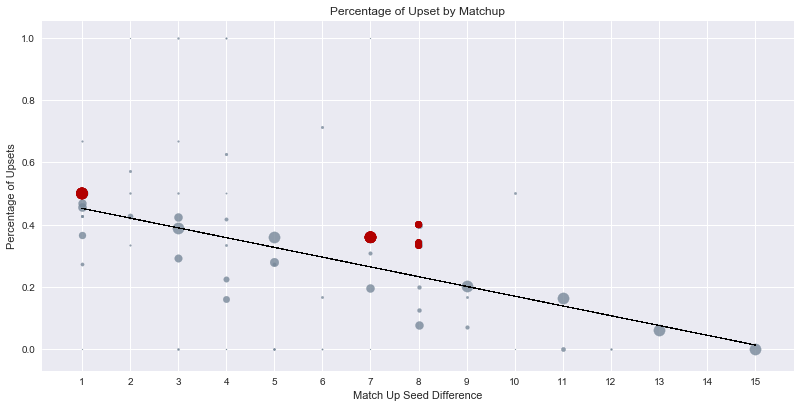

In [21]:
yearly_df = upsets_df[upsets_df['games_per_year'] >= 1].copy()
plot_all_matchups_best_fit(upsets_df, under_dog_df)
plot_subset_matchups(yearly_df, 'top', 5, '#B20000', 'o')
plt.show()